In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import daft
from daft import PGM

import matplotlib.pyplot as plt 

# DAFT

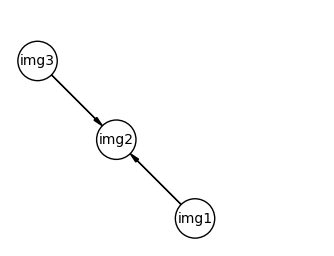

In [8]:
pgm = PGM(shape=(4,3))

pgm.add_node(daft.Node('i1', 'img1', 3, 1))
pgm.add_node(daft.Node('i2', 'img2', 2, 2))
pgm.add_node(daft.Node('i3', 'img3', 1, 3))

pgm.add_edge('i1', 'i2')
pgm.add_edge('i3', 'i2')

pgm.render()
plt.show()

# PGMPY

In [21]:
import pandas as pd 
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

In [22]:
data = pd.read_csv('soe_data.csv')
soe_cols = [c for c in data.columns if c.startswith('soe')]
factor_columns = ['@input.Affinity', '@input.MeetNeeds', '@input.Dynamic', '@input.Unique']

data.columns

Index(['id', 'brand', 'IMG01_', 'IMG02_', 'IMG03_', 'IMG04_', 'IMG05_',
       'IMG06_', 'IMG07_', 'IMG08_', 'IMG09_', 'IMG10_', 'IMG11_', 'IMG12_',
       'IMG13_', 'IMG14_', 'IMG15_', 'IMG16_', 'IMG17_', 'IMG18_', 'IMG19_',
       'IMG20_', 'IMG21_', 'IMG22_', 'IMG23_', 'IMG24_', 'IMG25_', 'IMG26_',
       '@input.Affinity', '@input.MeetNeeds', '@input.Dynamic',
       '@input.Unique', 'Meaningful', 'Salient', 'Different', 'M_F_I', 'D_F_I',
       'S_F_I', 'Power', 'Premium v2', 'soe.IMG01_', 'soe.IMG02_',
       'soe.IMG03_', 'soe.IMG04_', 'soe.IMG05_', 'soe.IMG06_', 'soe.IMG07_',
       'soe.IMG08_', 'soe.IMG09_', 'soe.IMG10_', 'soe.IMG11_', 'soe.IMG12_',
       'soe.IMG13_', 'soe.IMG14_', 'soe.IMG15_', 'soe.IMG16_', 'soe.IMG17_',
       'soe.IMG18_', 'soe.IMG19_', 'soe.IMG20_', 'soe.IMG21_', 'soe.IMG22_',
       'soe.IMG23_', 'soe.IMG24_', 'soe.IMG25_', 'soe.IMG26_'],
      dtype='object')

In [6]:
d = data[soe_cols] 
d = d[d.notna().all(axis=1)]
#d = d.set_axis([c.split(".")[1].split("_")[0] for c in soe_cols], axis=1)
renamer = {
    'soe.IMG01_': 'Enabl_close',
    'soe.IMG02_': 'fresh_breath',
    'soe.IMG03_': 'Natural_ingr',
    'soe.IMG04_': 'Oral_health',
    'soe.IMG05_': 'Confdnc_closer',
    'soe.IMG06_': 'Trust',
    'soe.IMG07_': 'Liked_family',
    'soe.IMG08_': 'Modern_date',
    'soe.IMG09_': 'Reco_dentists',
    'soe.IMG10_': 'Goodlook_teeth',
    'soe.IMG11_': 'Likeable_flav',
    'soe.IMG12_': 'Pack',
    'soe.IMG13_': 'Eff_paste',
    'soe.IMG14_': 'Meet_needs',
    'soe.IMG15_': 'Gums_health',
    'soe.IMG16_': 'Fresh_longer',
    'soe.IMG17_': 'Whiter_teeth',
    'soe.IMG18_': 'No_cavities',
    'soe.IMG19_': 'No_sensitiviti',
    'soe.IMG20_': 'Enamel',
    'soe.IMG21_': 'Daily_use',
    'soe.IMG22_': 'Eff_wash',
    'soe.IMG23_': 'Immunity',
    'soe.IMG24_': 'Quality',
    'soe.IMG25_': 'Lots_innovs',
    'soe.IMG26_': 'Innov_prods',
    '@input.Dynamic': 'LEADER', 
    '@input.Unique': 'UNIQUE', 
    '@input.Affinity': 'AFFINITY', 
    '@input.MeetNeeds': 'MEETNEEDS'
}
d = d.rename(columns=renamer)
d.head()

,Enabl_close,fresh_breath,Natural_ingr,Oral_health,Confdnc_closer,Trust,Liked_family,Modern_date,Reco_dentists,Goodlook_teeth,...,Whiter_teeth,No_cavities,No_sensitiviti,Enamel,Daily_use,Eff_wash,Immunity,Quality,Lots_innovs,Innov_prods
0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.25,0.0,0.2,0.0,0.0,0.0,0.333333,...,0.0,0.142857,1.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.0,0.00,0.0,0.2,0.0,0.0,0.0,0.000000,...,0.0,0.142857,0.0,0.0,0.125,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.142857,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.25,0.0,0.2,0.0,0.0,0.0,0.000000,...,0.0,0.142857,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0


In [7]:
hc = HillClimbSearch(d)
best_model = hc.estimate(scoring_method=BicScore(d))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Oral_health', 'Immunity'), ('Oral_health', 'Gums_health'), ('Oral_health', 'Reco_dentists'), ('Confdnc_closer', 'Enabl_close'), ('Trust', 'Liked_family'), ('Trust', 'Eff_paste'), ('Trust', 'Likeable_flav'), ('Trust', 'Modern_date'), ('Trust', 'Quality'), ('Modern_date', 'Innov_prods'), ('Goodlook_teeth', 'Confdnc_closer'), ('Goodlook_teeth', 'Fresh_longer'), ('Goodlook_teeth', 'Whiter_teeth'), ('Likeable_flav', 'Pack'), ('Eff_paste', 'Eff_wash'), ('Meet_needs', 'Oral_health'), ('Meet_needs', 'Daily_use'), ('Meet_needs', 'Trust'), ('Gums_health', 'No_sensitiviti'), ('Fresh_longer', 'fresh_breath'), ('No_cavities', 'Meet_needs'), ('No_cavities', 'Goodlook_teeth'), ('No_cavities', 'Enamel'), ('Immunity', 'Natural_ingr'), ('Innov_prods', 'Lots_innovs')]


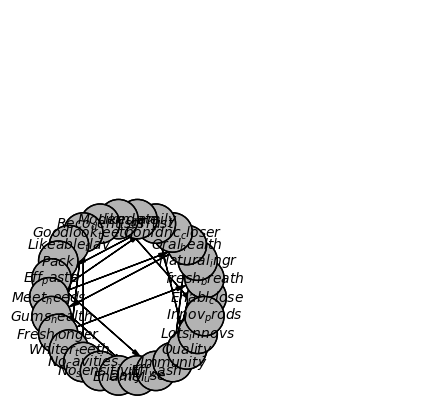

In [8]:
best_daft = best_model.to_daft(node_pos='circular', pgm_params={'shape': (5,5)})
best_daft.render()
plt.show()

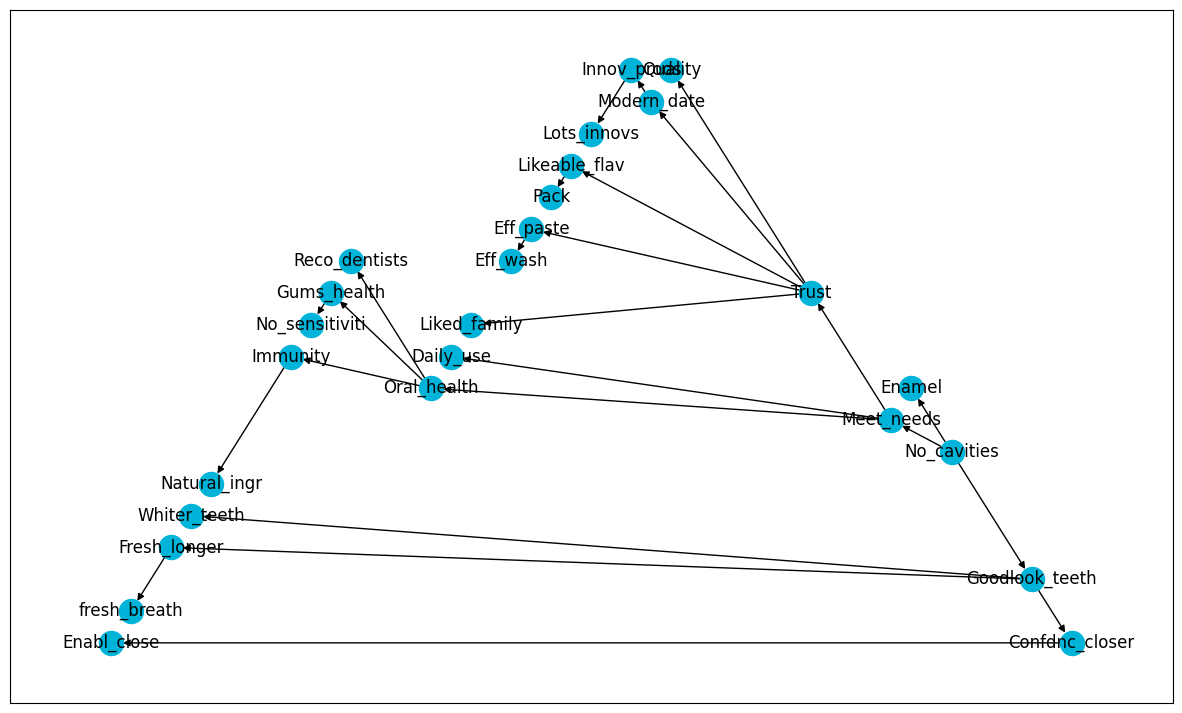

In [9]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,9))

pos = nx.planar_layout(best_model)
nx.draw_networkx(best_model, node_color='#00b4d9', pos=pos, with_labels=True, ax=ax) 

In [320]:
import pygraphviz as pgv
import io

from PIL import Image

def PlotModel(model):
    stream = io.BytesIO()
    model.to_graphviz().draw(stream, format='png', prog='dot')
    return Image.open(stream)

def PlotGraph(graph):
    stream = io.BytesIO()
    graph.draw(stream, format='png', prog='dot')
    return Image.open(stream)

In [18]:
G = best_model.to_graphviz()

In [24]:
stream = io.BytesIO()
G.draw(stream, format='png', prog='dot')

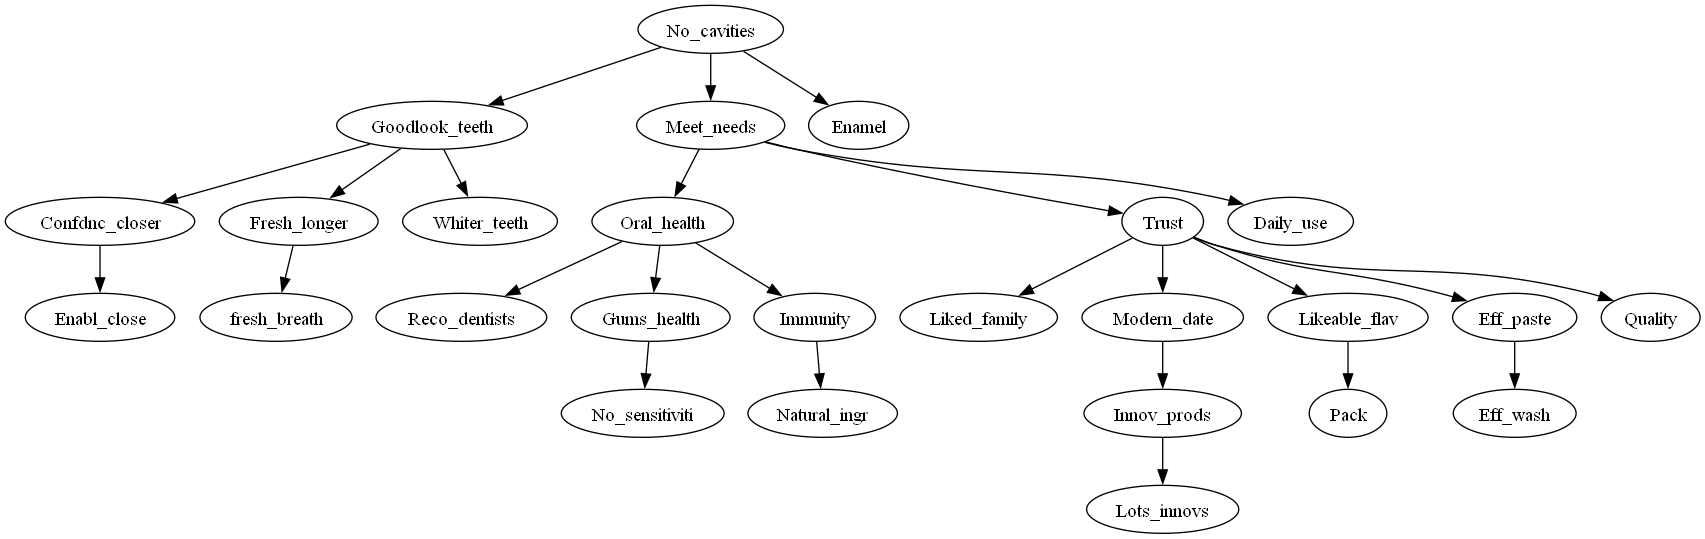

In [29]:
Image.open(stream)

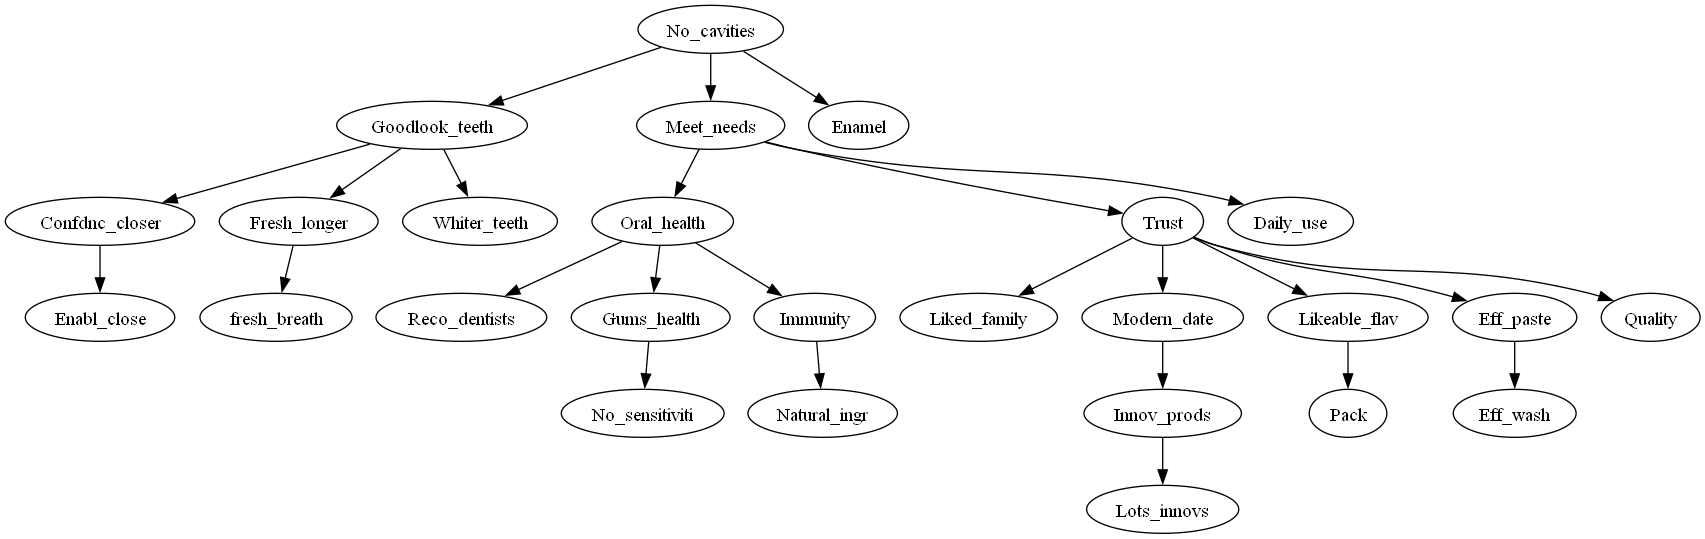

In [33]:
PlotModel(best_model)

# Continous

In [55]:
from pgmpy.estimators import PC

est = PC(d)
skel, seperating_sets = est.build_skeleton(ci_test='pearsonr', significance_level=0.01)
print("Undirected edges: ", skel.edges())

#pdag = est.skeleton_to_pdag(skel, seperating_sets)
#print("PDAG edges:       ", pdag.edges())

#model = pdag.to_dag()
#print("DAG edges:        ", model.edges())

Working for n conditional variables: 5: 100%|██████████████████████████████████████| 5/5 [20:08:07<00:00, 14497.46s/it]

Undirected edges:  [('Enabl_close', 'fresh_breath'), ('Enabl_close', 'Natural_ingr'), ('Enabl_close', 'Oral_health'), ('Enabl_close', 'Confdnc_closer'), ('Enabl_close', 'Trust'), ('Enabl_close', 'Liked_family'), ('Enabl_close', 'Modern_date'), ('Enabl_close', 'Reco_dentists'), ('Enabl_close', 'Goodlook_teeth'), ('Enabl_close', 'Likeable_flav'), ('Enabl_close', 'Pack'), ('Enabl_close', 'Eff_paste'), ('Enabl_close', 'Meet_needs'), ('Enabl_close', 'Gums_health'), ('Enabl_close', 'Fresh_longer'), ('Enabl_close', 'Whiter_teeth'), ('Enabl_close', 'No_cavities'), ('Enabl_close', 'No_sensitiviti'), ('Enabl_close', 'Enamel'), ('Enabl_close', 'Daily_use'), ('Enabl_close', 'Eff_wash'), ('Enabl_close', 'Immunity'), ('Enabl_close', 'Quality'), ('Enabl_close', 'Lots_innovs'), ('Enabl_close', 'Innov_prods'), ('fresh_breath', 'Oral_health'), ('fresh_breath', 'Confdnc_closer'), ('fresh_breath', 'Trust'), ('fresh_breath', 'Liked_family'), ('fresh_breath', 'Modern_date'), ('fresh_breath', 'Goodlook_teeth

In [57]:
len(skel.edges())

253

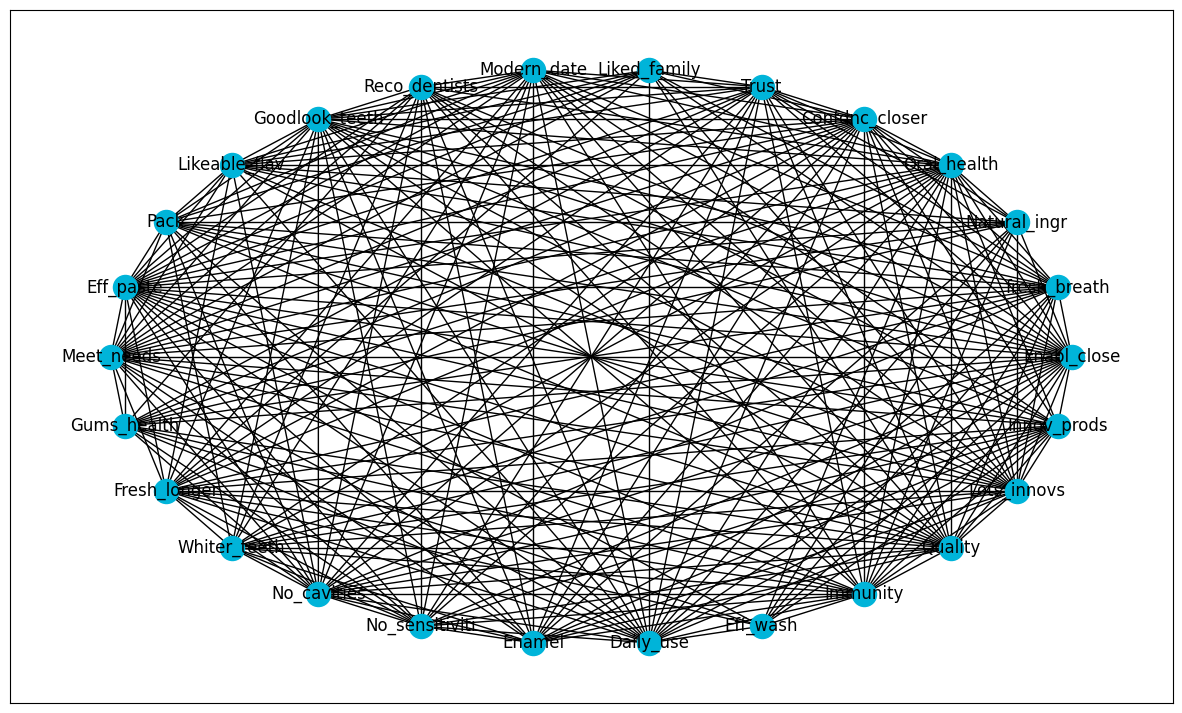

In [61]:
fig, ax = plt.subplots(figsize=(15,9))

pos = nx.circular_layout(skel)
nx.draw_networkx(skel, node_color='#00b4d9', pos=pos, with_labels=True, ax=ax) 

In [2]:
from BSA import ExploratoryAnalysis

In [82]:
expl.data

,id,brand,brand_name,UNA5_Q1.1,UNA2_Q1.1,UNA8_Q1.1,SS_SubSample1,UNA4_Q1.1,SS_SubSample3,SS_SubSample5,...,soe.IMG20_,soe.IMG21_,soe.IMG22_,soe.IMG23_,soe.IMG24_,soe.IMG25_,soe.IMG26_,soe.IMG27_,@id,@base
0,850017,22,Goon,8.0,23.0,NaN,NaN,2.0,1.0,1.0,...,0.0,0.166667,0.0,0.2,0.0,0.0,0.0,0.0,850017,2100
1,850017,2,Huggies,8.0,23.0,NaN,NaN,2.0,1.0,1.0,...,0.5,0.166667,0.0,0.2,0.0,0.0,0.0,0.0,850017,2100
2,850017,231,Joonies,8.0,23.0,NaN,NaN,2.0,1.0,1.0,...,0.0,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,850017,2100
3,850017,13,Libero,8.0,23.0,NaN,NaN,2.0,1.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,850017,2100
4,850017,23,Merries,8.0,23.0,NaN,NaN,2.0,1.0,1.0,...,0.0,0.166667,0.0,0.2,0.0,0.0,0.0,0.0,850017,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,940251,13,Libero,18.0,2.0,NaN,1.0,22.0,1.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,940251,2100
16796,940251,23,Merries,18.0,2.0,NaN,1.0,22.0,1.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,940251,2100
16797,940251,18,Moony,18.0,2.0,NaN,1.0,22.0,1.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,940251,2100
16798,940251,8,Pampers,18.0,2.0,NaN,1.0,22.0,1.0,NaN,...,1.0,1.000000,1.0,1.0,1.0,0.5,0.0,1.0,940251,2100


In [233]:
expl = ExploratoryAnalysis()
expl.ExploratoryReport('data.xlsx')

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [24]:
import statsmodels.api as sm

In [183]:
def Standardize(df, across_all_dataframe=False): 
    if across_all_dataframe: 
        return df.sub(df.mean(axis=None)).div(df.stack().std())
    else:
        return df.sub(df.mean()).div(df.std())

In [155]:
X = expl.GetCleanSOEDataForSet(expl.image_sets[0])
y = expl.clean_data[[expl.factor_columns[1]]]

In [185]:
#model = sm.OLS(y, sm.add_constant(X)).fit()
model = sm.OLS(Standardize(y), Standardize(X, across_all_dataframe=True)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       @input.MeetNeeds   R-squared (uncentered):                   0.462
Model:                            OLS   Adj. R-squared (uncentered):              0.461
Method:                 Least Squares   F-statistic:                              507.9
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:33:53   Log-Likelihood:                         -17112.
No. Observations:               15426   AIC:                                  3.428e+04
Df Residuals:                   15400   BIC:                                  3.448e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Enabl_close        0.0158      0.009      1.786      0.074      -0.002       0.033
fresh_breath       0.0239      0.008      3.174      0.002       0.009       0.039
Natural_ingr      -0.0116      0.006     -1.796      0.073      -0.024       0.001
Oral_health        0.0249      0.009      2.888      0.004       0.008       0.042
Confdnc_closer     0.0098      0.009      1.110      0.267      -0.007       0.027
Trust              0.1963      0.009     22.237      0.000       0.179       0.214
Liked_family       0.1884      0.007     26.778      0.000       0.175       0.202
Modern_date       -0.0110      0.009     -1.273      0.203      -0.028       0.006
Reco_dentists      0.0195      0.007      2.792      0.005       0.006       0.033
Goodlook_teeth     0.0580      0.009      6.750      0.000       0.041       0.075
Likeable_flav      0.0774      0.008     10.152      0.000       0.062       0.092
Pack               0.0042      0.007      0.624      0.533      -0.009       0.017
Eff_paste          0.0496      0.008      6.338      0.000       0.034       0.065
Meet_needs         0.0419      0.008      5.111      0.000       0.026       0.058
Gums_health       -0.0057      0.007     -0.820      0.412      -0.019       0.008
Fresh_longer       0.0290      0.008      3.626      0.000       0.013       0.045
Whiter_teeth       0.0062      0.008      0.802      0.423      -0.009       0.021
No_cavities        0.0244      0.009      2.766      0.006       0.007       0.042
No_sensitiviti     0.0147      0.007      2.241      0.025       0.002       0.028
Enamel             0.0359      0.008      4.437      0.000       0.020       0.052
Daily_use         -0.0483      0.009     -5.376      0.000      -0.066      -0.031
Eff_wash          -0.0067      0.006     -1.093      0.274      -0.019       0.005
Immunity           0.0120      0.008      1.441      0.150      -0.004       0.028
Quality            0.1279      0.008     16.273      0.000       0.112       0.143
Lots_innovs       -0.0176      0.007     -2.430      0.015      -0.032      -0.003
Innov_prods       -0.0076      0.008     -0.940      0.347      -0.024       0.008
==============================================================================
Omnibus:                     4624.772   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21158.600
Skew:                           1.396   Prob(JB):                         0.00
Kurtosis:                       8.013   Cond. No.                         5.52
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.


In [126]:
import io

In [131]:
pd.read_html(io.StringIO(model1.summary().tables[1].as_html()), index_col=0, header=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
fresh_breath,0.0141,0.004,3.729,0.000,0.007,0.022
Oral_health,0.0240,0.004,5.638,0.000,0.016,0.032
Trust,0.1060,0.005,23.553,0.000,0.097,0.115
Liked_family,0.0918,0.004,25.729,0.000,0.085,0.099
Modern_date,0.0244,0.004,5.612,0.000,0.016,0.033
Reco_dentists,0.0226,0.004,6.368,0.000,0.016,0.030
Goodlook_teeth,0.0255,0.004,5.938,0.000,0.017,0.034
Likeable_flav,0.0535,0.004,13.948,0.000,0.046,0.061
Eff_paste,0.0288,0.004,7.538,0.000,0.021,0.036
Meet_needs,0.0296,0.004,7.139,0.000,0.021,0.038


# SKLEARN SFS

In [68]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [69]:
reg = LinearRegression()
sfs = SequentialFeatureSelector(reg).fit(X, y)

In [70]:
sfs.get_support()

array([False, False, False,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True,  True, False, False,  True,  True, False])

In [73]:
X.columns[sfs.get_support()]

Index(['Oral_health', 'Trust', 'Liked_family', 'Reco_dentists',
       'Goodlook_teeth', 'Likeable_flav', 'Eff_paste', 'Meet_needs',
       'Fresh_longer', 'Enamel', 'Daily_use', 'Quality', 'Lots_innovs'],
      dtype='object')

In [84]:
from sklearn.feature_selection import RFECV

In [188]:
#selector = RFECV(reg, step=1, cv=5).fit(X, y)
selector = RFECV(reg).fit(X, y)

In [87]:
selector.support_

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True])

In [190]:
selector.ranking_

array([1, 1, 1, 1, 3, 1, 1, 8, 1, 1, 1, 5, 1, 1, 7, 1, 6, 1, 1, 1, 1, 2,
       4, 1, 1, 1])

In [195]:
X

,Enabl_close,fresh_breath,Natural_ingr,Oral_health,Confdnc_closer,Trust,Liked_family,Modern_date,Reco_dentists,Goodlook_teeth,...,Whiter_teeth,No_cavities,No_sensitiviti,Enamel,Daily_use,Eff_wash,Immunity,Quality,Lots_innovs,Innov_prods
0,0.00,0.000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00
2,0.00,0.000,0.0,0.25,0.0,0.200000,0.0,0.000000,0.0,0.333333,...,0.000000,0.142857,1.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00
3,0.50,0.000,0.0,0.00,0.0,0.200000,0.0,0.000000,0.0,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.125,0.000000,0.000000,0.0,1.00,0.00
4,0.00,0.000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00
5,0.00,0.000,0.0,0.25,0.0,0.200000,0.0,0.000000,0.0,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,0.00,0.000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00
23996,0.25,0.125,0.0,0.00,0.0,0.166667,0.0,0.142857,0.0,0.000000,...,0.333333,0.142857,0.142857,0.142857,0.500,0.142857,0.142857,0.2,0.25,0.25
23997,0.00,0.125,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00
23998,0.00,0.125,0.0,0.00,0.0,0.166667,0.0,0.142857,0.0,0.000000,...,0.000000,0.142857,0.142857,0.142857,0.000,0.142857,0.142857,0.0,0.00,0.00


# build graph

In [237]:
from BSA import SelectFirstOrderDrivers, Standardize, CalcLinRegWithVarSelect

In [232]:
#frst layer

y = Standardize(expl.clean_data[factor_columns], across_all_dataframe=False)
X = Standardize(expl.GetCleanSOEDataForSet(expl.image_sets[2]), across_all_dataframe=True)

first_layer = SelectFirstOrderDrivers(X, y)
first_layer_list = first_layer[first_layer].index
first_layer_list

Index(['Fresh breath', 'Liked family', 'Reco dentists', 'Goodlook teeth',
       'Likeable flav', 'Pack', 'Eff paste/wash', 'Care oral health family',
       'Quality', 'Lots innovs', 'Innov prods'],
      dtype='object')

In [249]:
first_layer

Enabl closesness           False
Fresh breath                True
Natural ingr               False
Imprve oral health         False
Confdnc closer             False
Liked family                True
Reco dentists               True
Goodlook teeth              True
Likeable flav               True
Pack                        True
Eff paste/wash              True
Care oral health family     True
Gums health                False
Fresh longer               False
Whiten                     False
No cavities                False
No sensitiviti             False
Enamel                     False
For daily use              False
Eff wash                   False
Immunity                   False
Quality                     True
Lots innovs                 True
Innov prods                 True
dtype: bool

In [251]:
y = Standardize(expl.GetCleanSOEDataForList(['Fresh breath']), across_all_dataframe=False)
X = Standardize(expl.GetCleanSOEDataForSet(expl.image_sets[2]), across_all_dataframe=True)

fresh_breath_layer = SelectFirstOrderDrivers(X, y)
fresh_breath_layer

Enabl closesness           False
Natural ingr               False
Imprve oral health         False
Confdnc closer              True
Liked family               False
Reco dentists              False
Goodlook teeth             False
Likeable flav               True
Pack                       False
Eff paste/wash             False
Care oral health family    False
Gums health                False
Fresh longer                True
Whiten                     False
No cavities                False
No sensitiviti             False
Enamel                     False
For daily use              False
Eff wash                    True
Immunity                   False
Quality                     True
Lots innovs                False
Innov prods                False
dtype: bool

In [248]:
#second layer 

y = Standardize(expl.GetCleanSOEDataForList(first_layer_list), across_all_dataframe=False)
X = Standardize(expl.GetCleanSOEDataForSet(expl.image_sets[2]), across_all_dataframe=True)

second_layer = SelectFirstOrderDrivers(X, y, 0.2)
second_layer_list = second_layer[second_layer].index
second_layer

Enabl closesness           True
Natural ingr               True
Imprve oral health         True
Confdnc closer             True
Liked family               True
Reco dentists              True
Goodlook teeth             True
Likeable flav              True
Pack                       True
Eff paste/wash             True
Care oral health family    True
Gums health                True
Fresh longer               True
Whiten                     True
No cavities                True
No sensitiviti             True
Enamel                     True
For daily use              True
Eff wash                   True
Immunity                   True
Quality                    True
Lots innovs                True
Innov prods                True
Fresh breath               True
dtype: bool

# Tree search

In [258]:
from pgmpy.estimators import TreeSearch

import pygraphviz as pgv
import io

from PIL import Image

def PlotModel(model):
    stream = io.BytesIO()
    model.to_graphviz().draw(stream, format='png', prog='dot')
    return Image.open(stream)

In [291]:
dd = expl.GetCleanSOEDataForSet(expl.image_sets[2])
dd.columns

Index(['Enabl closesness', 'Fresh breath', 'Natural ingr',
       'Imprve oral health', 'Confdnc closer', 'Liked family', 'Reco dentists',
       'Goodlook teeth', 'Likeable flav', 'Pack', 'Eff paste/wash',
       'Care oral health family', 'Gums health', 'Fresh longer', 'Whiten',
       'No cavities', 'No sensitiviti', 'Enamel', 'For daily use', 'Eff wash',
       'Immunity', 'Quality', 'Lots innovs', 'Innov prods'],
      dtype='object')

In [297]:
model.edges

OutEdgeView([('Liked family', '@input.MeetNeeds'), ('@input.MeetNeeds', '@input.Unique'), ('@input.MeetNeeds', '@input.Dynamic'), ('@input.MeetNeeds', '@input.Affinity'), ('@input.MeetNeeds', 'Likeable flav'), ('@input.MeetNeeds', 'Care oral health family'), ('@input.MeetNeeds', 'Imprve oral health'), ('@input.MeetNeeds', 'Eff paste/wash'), ('@input.MeetNeeds', 'Fresh longer'), ('@input.MeetNeeds', 'Confdnc closer'), ('@input.MeetNeeds', 'Enamel'), ('@input.Unique', 'Natural ingr'), ('@input.Dynamic', 'For daily use'), ('@input.Dynamic', 'Quality'), ('@input.Dynamic', 'Reco dentists'), ('@input.Dynamic', 'Innov prods'), ('@input.Dynamic', 'Pack'), ('@input.Dynamic', 'Lots innovs'), ('@input.Dynamic', 'Whiten'), ('Care oral health family', 'No cavities'), ('Imprve oral health', 'Immunity'), ('Imprve oral health', 'Gums health'), ('Eff paste/wash', 'Eff wash'), ('Fresh longer', 'Fresh breath'), ('Confdnc closer', 'Enabl closesness'), ('No cavities', 'Goodlook teeth'), ('Gums health', 'No

Building tree:   0%|          | 0/276.0 [00:00<?, ?it/s]

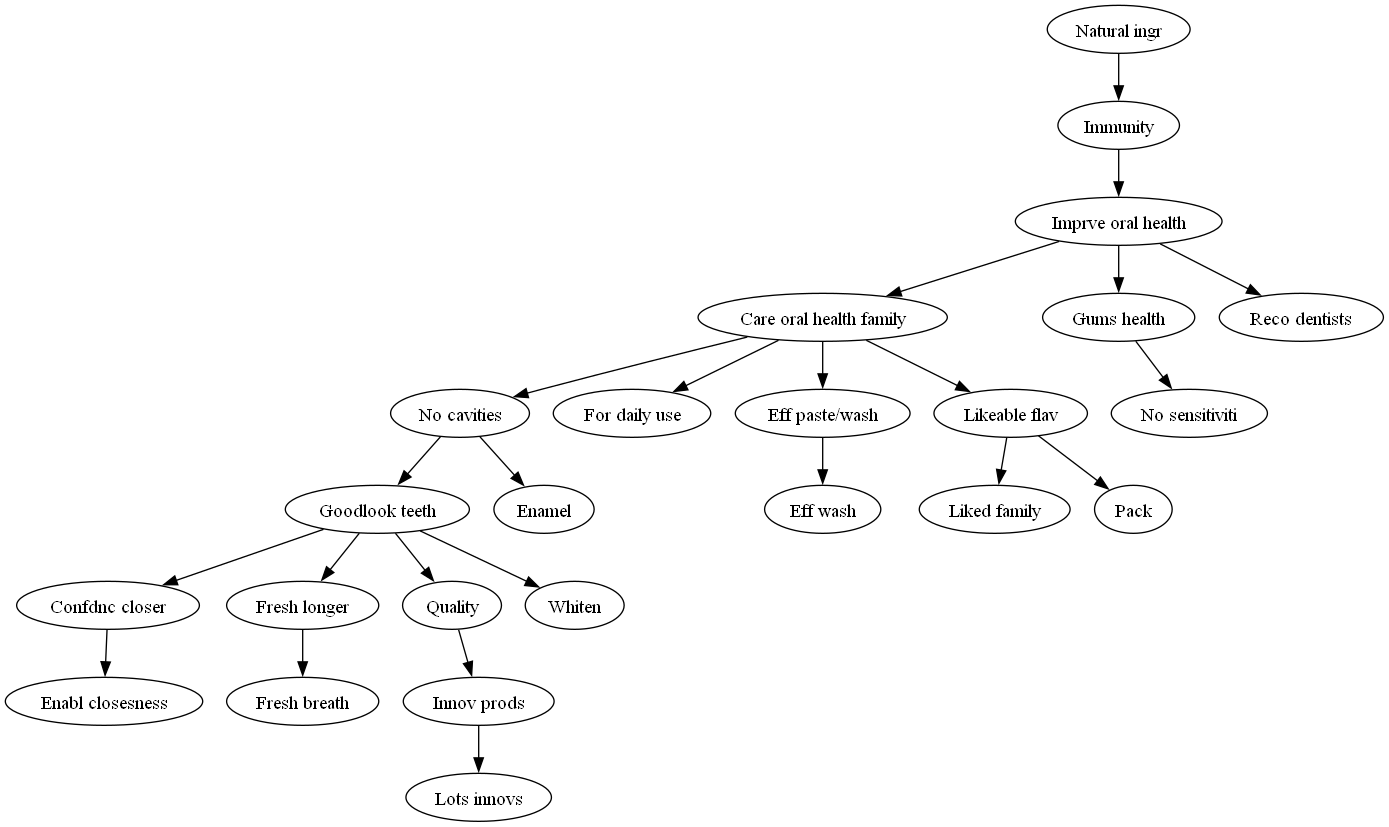

In [292]:
est = TreeSearch(dd, root_node='Natural ingr')
model = est.estimate(estimator_type='chow-liu')

PlotModel(model)

In [274]:
all_images = ['Enabl closesness', 'Fresh breath', 'Natural ingr',
       'Imprve oral health', 'Confdnc closer', 'Liked family', 'Reco dentists',
       'Goodlook teeth', 'Likeable flav', 'Pack', 'Eff paste/wash',
       'Care oral health family', 'Gums health', 'Fresh longer', 'Whiten',
       'No cavities', 'No sensitiviti', 'Enamel', 'For daily use', 'Eff wash',
       'Immunity', 'Quality', 'Lots innovs', 'Innov prods']

factor_columns = ['@input.Affinity', '@input.MeetNeeds', '@input.Dynamic', '@input.Unique']

Building tree:   0%|          | 0/378.0 [00:00<?, ?it/s]

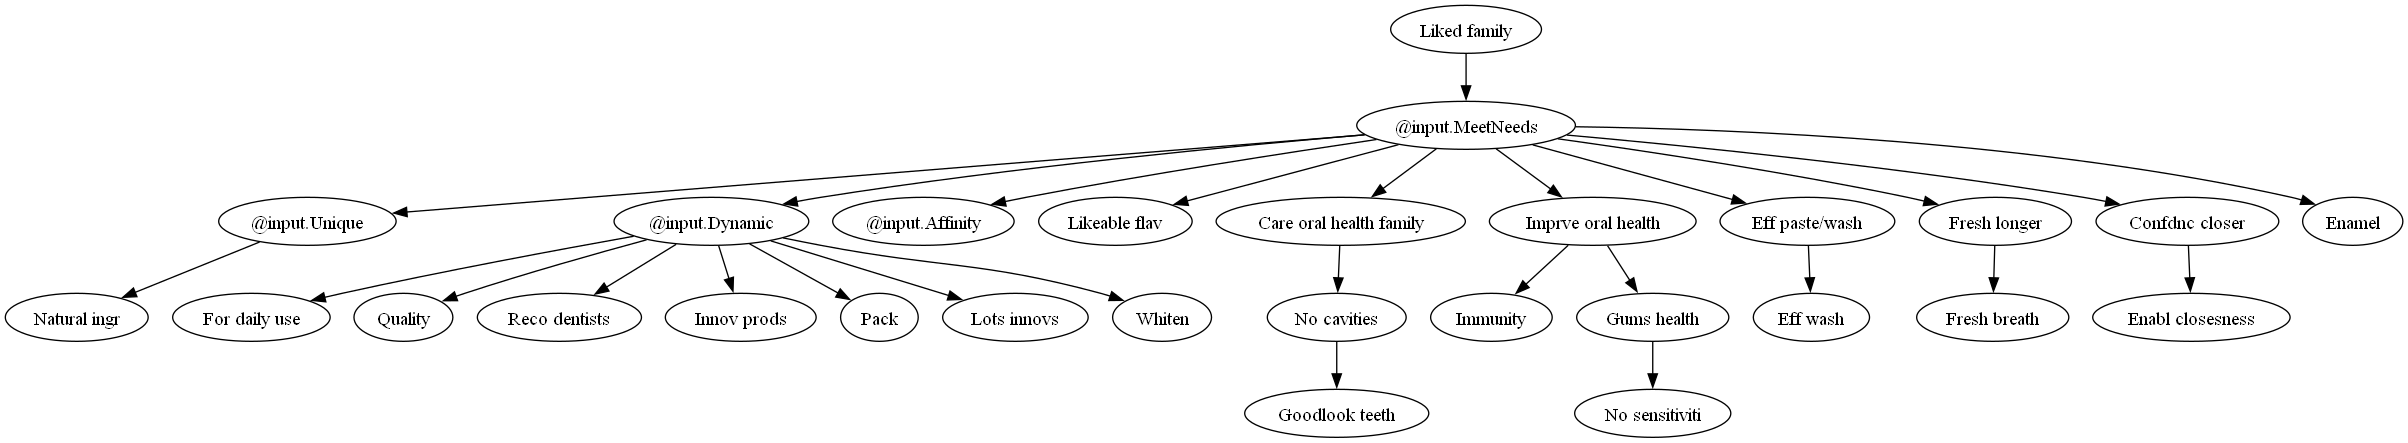

In [295]:
root_node = 'Liked family'

dd = expl.GetCleanSOEDataForList(all_images + factor_columns)

est = TreeSearch(dd, root_node=root_node)
model = est.estimate(estimator_type='chow-liu')

PlotModel(model)

# Graph Module

In [335]:
from GraphUtils import GraphManipulations

In [341]:
dir(pgv.AGraph)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_handle',
 '_draw',
 '_get_fh',
 '_get_prog',
 '_layout',
 '_manually_parse_args',
 '_prepare_nbunch',
 '_repr_mimebundle_',
 '_run_prog',
 '_svg_repr',
 '_update_handle_references',
 '_which',
 'acyclic',
 'add_cycle',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_path',
 'add_subgraph',
 'clear',
 'close',
 'copy',
 'degree',
 'degree_iter',
 'delete_edge',
 'delete_edges_from',
 'delete_node',
 'delete_nodes_from',
 'delete_subgraph',
 'directed',
 'draw',
 'edges',
 'edges_it

In [340]:
G = GraphManipulations(model)
G.Edges()

[('Liked family', '@input.MeetNeeds'),
 ('@input.MeetNeeds', '@input.Unique'),
 ('@input.MeetNeeds', '@input.Dynamic'),
 ('@input.MeetNeeds', '@input.Affinity'),
 ('@input.MeetNeeds', 'Likeable flav'),
 ('@input.MeetNeeds', 'Care oral health family'),
 ('@input.MeetNeeds', 'Imprve oral health'),
 ('@input.MeetNeeds', 'Eff paste/wash'),
 ('@input.MeetNeeds', 'Fresh longer'),
 ('@input.MeetNeeds', 'Confdnc closer'),
 ('@input.MeetNeeds', 'Enamel'),
 ('@input.Unique', 'Natural ingr'),
 ('@input.Dynamic', 'For daily use'),
 ('@input.Dynamic', 'Quality'),
 ('@input.Dynamic', 'Reco dentists'),
 ('@input.Dynamic', 'Innov prods'),
 ('@input.Dynamic', 'Pack'),
 ('@input.Dynamic', 'Lots innovs'),
 ('@input.Dynamic', 'Whiten'),
 ('Care oral health family', 'No cavities'),
 ('Imprve oral health', 'Immunity'),
 ('Imprve oral health', 'Gums health'),
 ('Eff paste/wash', 'Eff wash'),
 ('Fresh longer', 'Fresh breath'),
 ('Confdnc closer', 'Enabl closesness'),
 ('No cavities', 'Goodlook teeth'),
 ('Gum

In [332]:
e = ag.get_edge('Liked family', '@input.MeetNeeds')
e.attr['label'] = 0.55
e.attr['label']

'0.55'

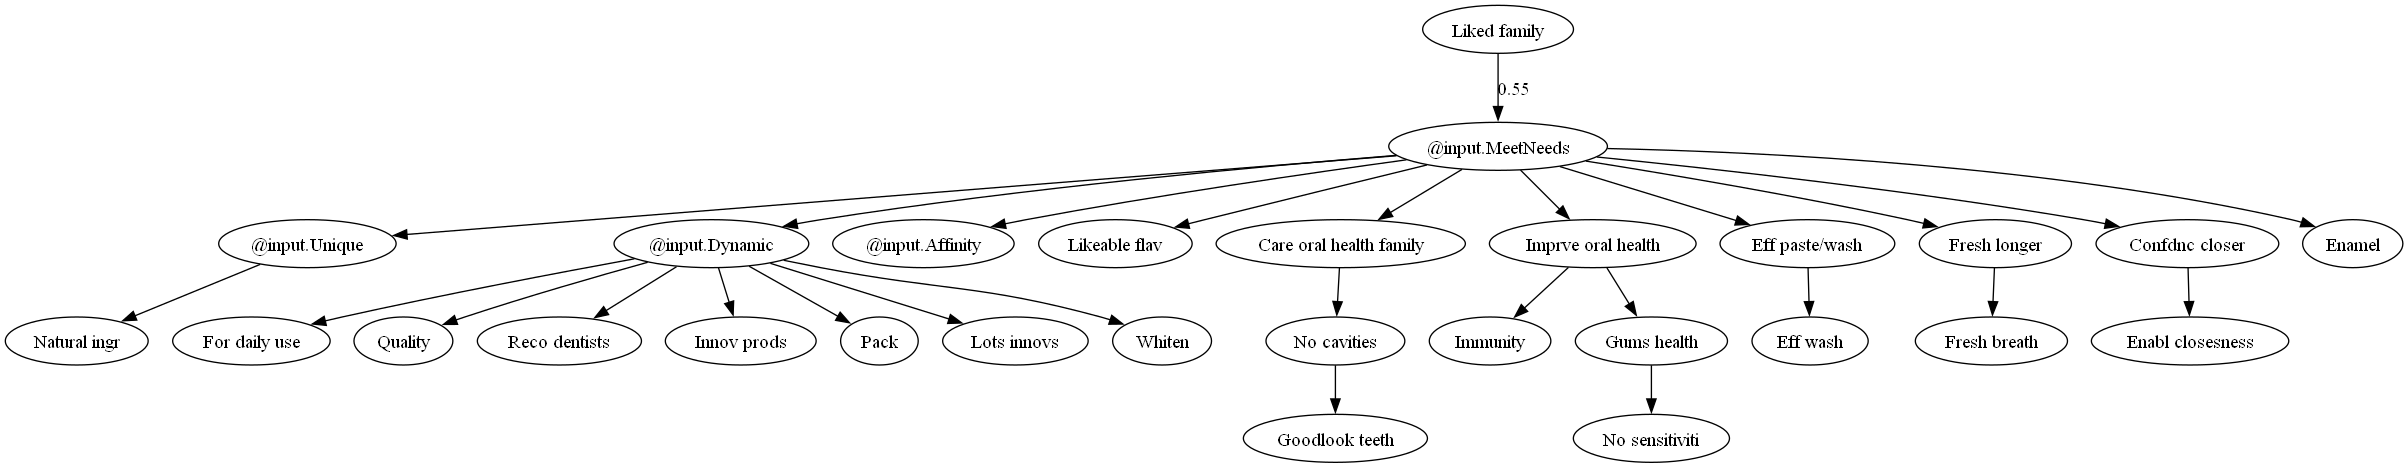

In [333]:
PlotGraph(ag)

In [317]:
ag.neighbors('@input.Dynamic')
ag.predecessors('@input.Dynamic')
ag.successors('@input.Dynamic')

['For daily use',
 'Quality',
 'Reco dentists',
 'Innov prods',
 'Pack',
 'Lots innovs',
 'Whiten']

In [344]:
ag.in_edges()

[('Liked family', '@input.MeetNeeds'),
 ('@input.MeetNeeds', '@input.Unique'),
 ('@input.MeetNeeds', '@input.Dynamic'),
 ('@input.MeetNeeds', '@input.Affinity'),
 ('@input.MeetNeeds', 'Likeable flav'),
 ('@input.MeetNeeds', 'Care oral health family'),
 ('@input.MeetNeeds', 'Imprve oral health'),
 ('@input.MeetNeeds', 'Eff paste/wash'),
 ('@input.MeetNeeds', 'Fresh longer'),
 ('@input.MeetNeeds', 'Confdnc closer'),
 ('@input.MeetNeeds', 'Enamel'),
 ('@input.Unique', 'Natural ingr'),
 ('@input.Dynamic', 'For daily use'),
 ('@input.Dynamic', 'Quality'),
 ('@input.Dynamic', 'Reco dentists'),
 ('@input.Dynamic', 'Innov prods'),
 ('@input.Dynamic', 'Pack'),
 ('@input.Dynamic', 'Lots innovs'),
 ('@input.Dynamic', 'Whiten'),
 ('Care oral health family', 'No cavities'),
 ('Imprve oral health', 'Immunity'),
 ('Imprve oral health', 'Gums health'),
 ('Eff paste/wash', 'Eff wash'),
 ('Fresh longer', 'Fresh breath'),
 ('Confdnc closer', 'Enabl closesness'),
 ('No cavities', 'Goodlook teeth'),
 ('Gum

In [347]:
ag.has_edge(('Liked family', 'input.MeetNeeds'))

False